In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


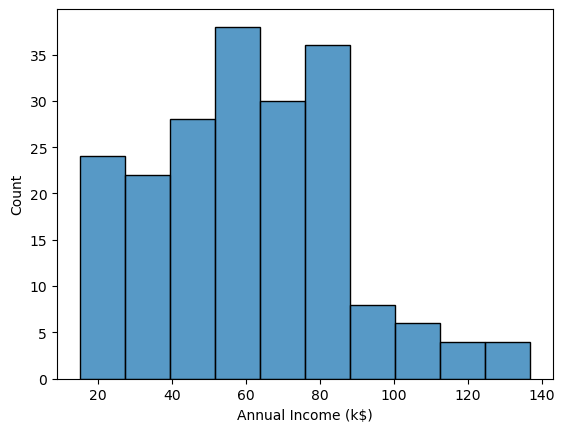

In [6]:
sns.histplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

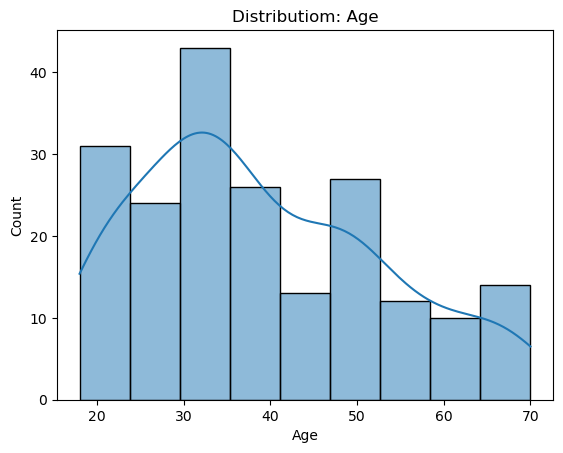

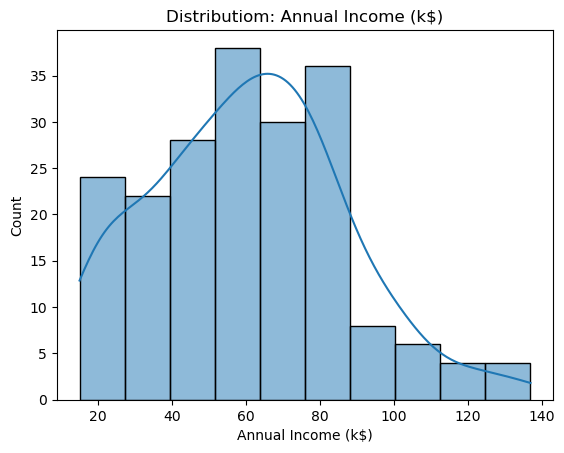

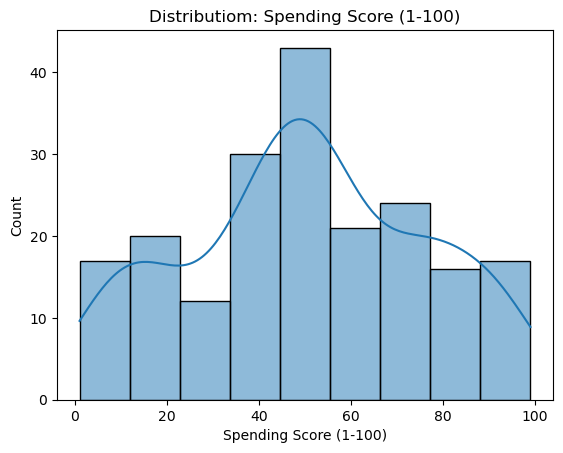

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.histplot(df[i], kde=True)
    plt.title(f"Distributiom: {i}")
    plt.xlabel(i); plt.ylabel("Count")
    plt.show()

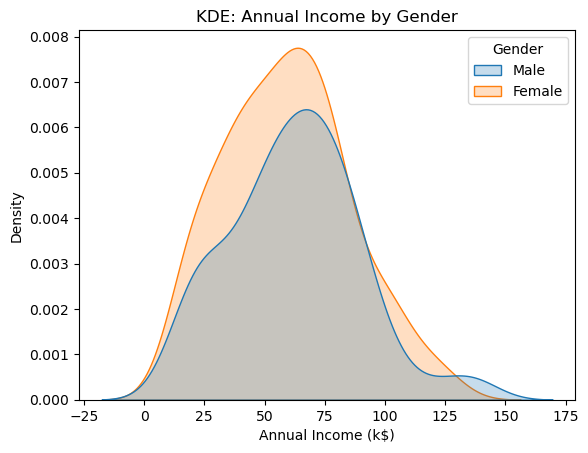

In [9]:
plt.figure()
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True)
plt.title("KDE: Annual Income by Gender")
plt.show()


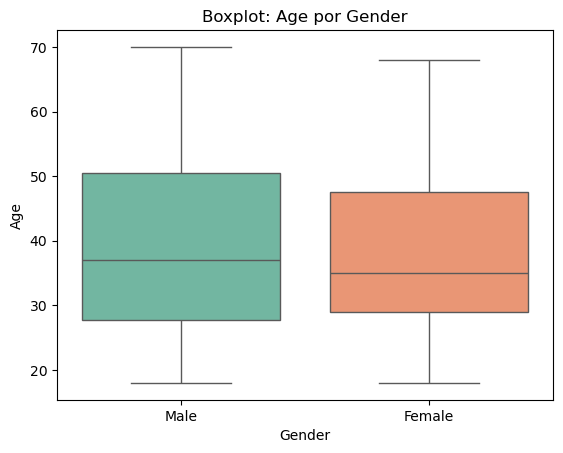

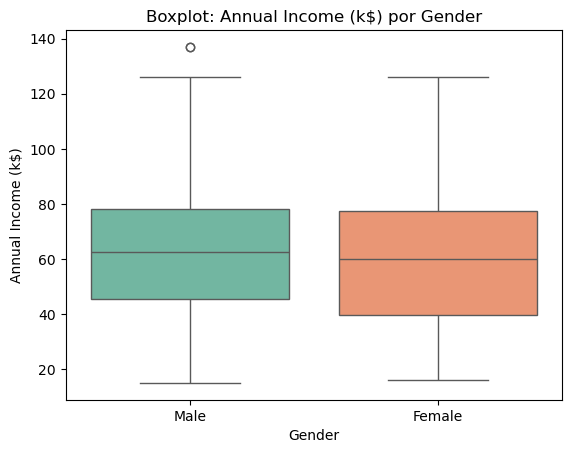

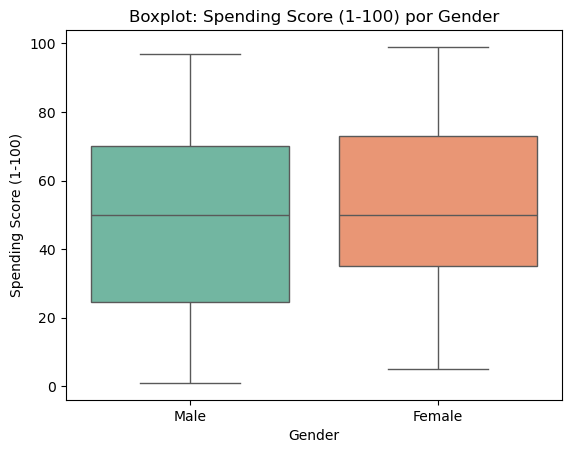

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(x='Gender', y=i, data=df, palette='Set2')
    plt.title(f'Boxplot: {i} por Gender')
    plt.show()



In [11]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

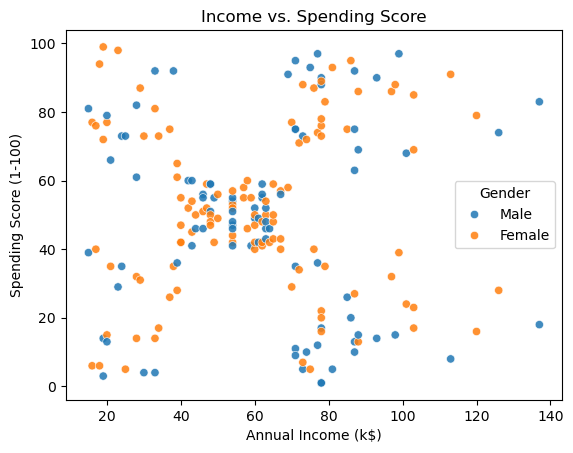

In [13]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    alpha=0.85
)
plt.title("Income vs. Spending Score")
plt.show()


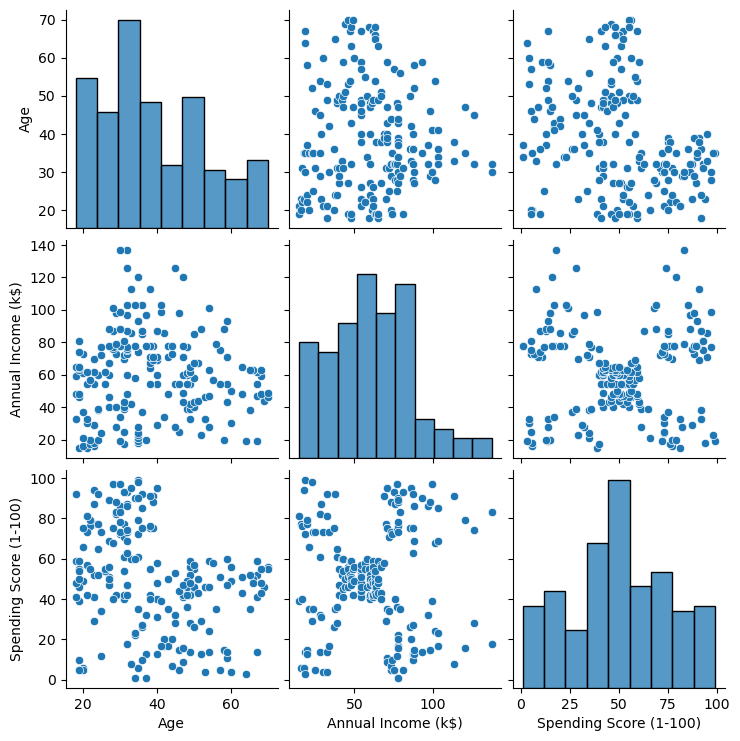

In [14]:
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

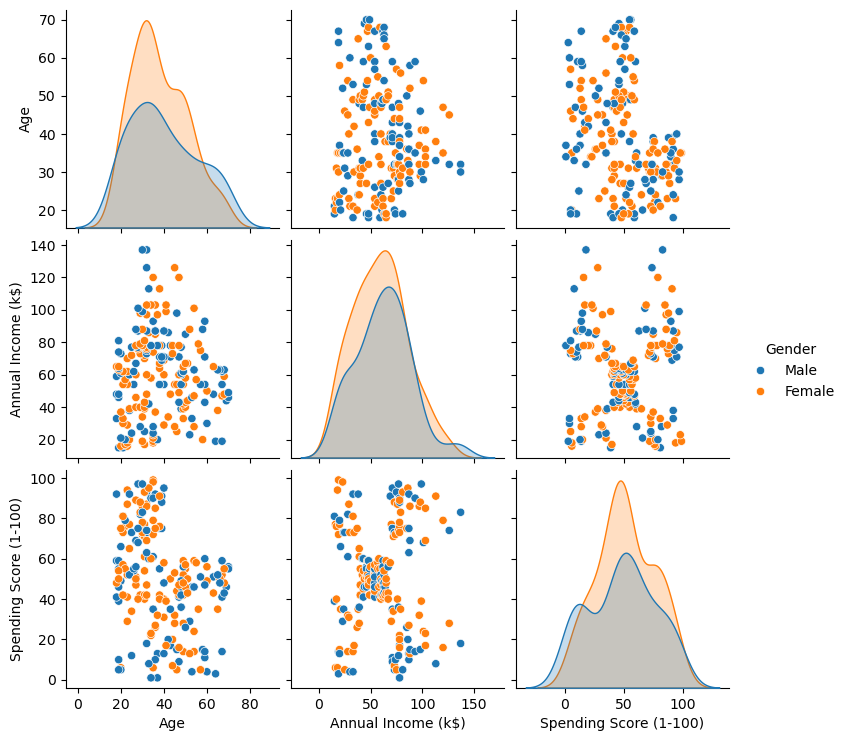

In [15]:
df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue="Gender")  # quick dimension split

In [16]:
df.groupby("Gender")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

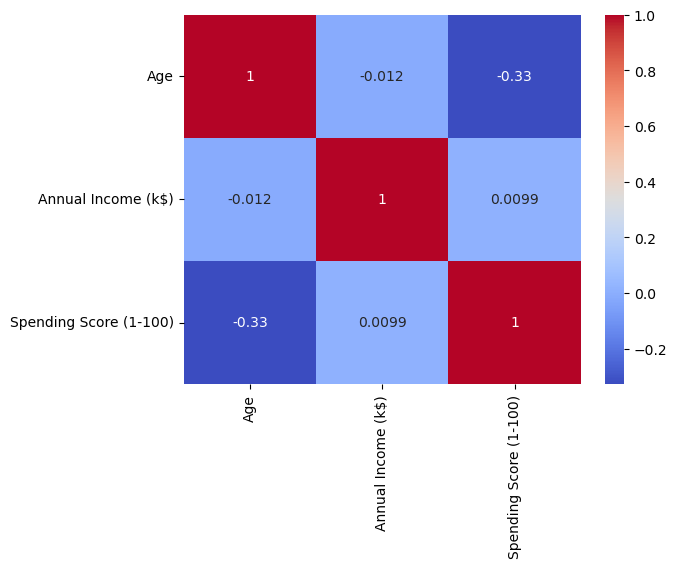

In [17]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Clustering = Univariate, Biavariate, Multivariate

In [19]:
# draft model with default params (n_clusters defaults to 8)
clustering1 = KMeans(n_clusters=8, n_init='auto', random_state=42)
clustering1.fit(df[["Annual Income (k$)"]])  # note the double brackets to keep a DataFrame

# attach labels back to the table
df["income_cluster"] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income_cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [20]:
df["income_cluster"].value_counts()

income_cluster
3    40
6    36
2    30
4    28
0    28
7    16
1    14
5     8
Name: count, dtype: int64

In [21]:
inertia_scores = []

for k in range(1, 12):  # k = 1..11
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(km.inertia_)


In [22]:
inertia_scores

[137277.28,
 49761.73701298701,
 25640.457784396836,
 13556.829274891777,
 8667.679614837509,
 5081.48466026727,
 4146.575343497084,
 2880.4579365079376,
 2318.5187423687426,
 1945.9507860560493,
 1539.5513708513708]

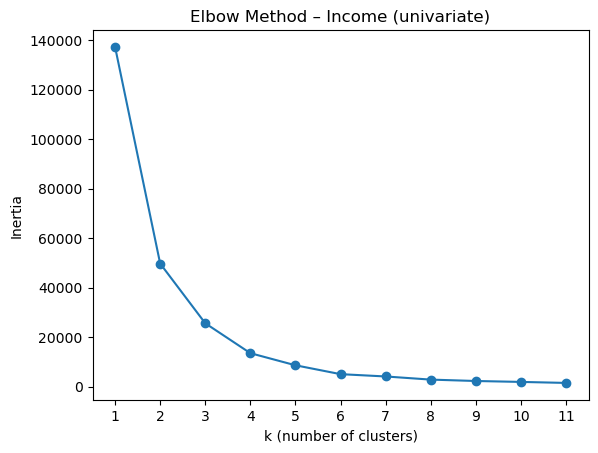

In [23]:
plt.figure()
plt.plot(range(1, 12), inertia_scores, marker="o")
plt.xticks(range(1, 12))
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method – Income (univariate)")
plt.show()

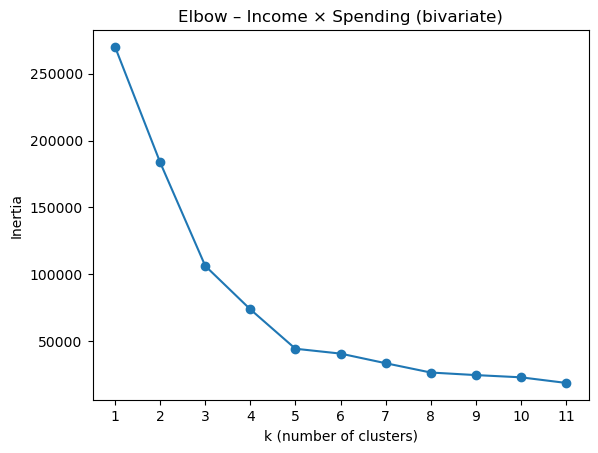

In [24]:
features_2d = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

inertia_scores_2d = []
ks = range(1, 12)

for k in ks:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(features_2d)
    inertia_scores_2d.append(km.inertia_)

plt.figure()
plt.plot(ks, inertia_scores_2d, marker="o")
plt.xticks(list(ks))
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow – Income × Spending (bivariate)")
plt.show()


In [25]:
km_2d = KMeans(n_clusters=5, n_init='auto', random_state=42).fit(features_2d)
df["income_spending_cluster"] = km_2d.labels_


In [26]:
# Centers (x = Income, y = Spending)
centers = pd.DataFrame(
    km_2d.cluster_centers_,
    columns=["Annual Income (k$)", "Spending Score (1-100)"]
)
centers.head()


,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


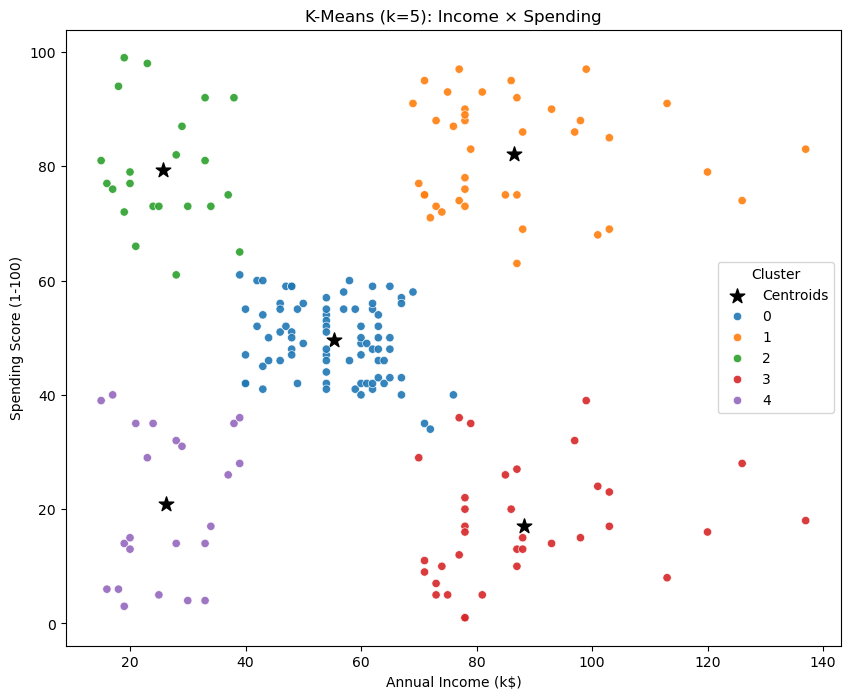

In [27]:
plt.figure(figsize=(10, 8))
# centroids (black stars)
plt.scatter(
    centers["Annual Income (k$)"],
    centers["Spending Score (1-100)"],
    s=120, c="black", marker="*",
    label="Centroids"
)
sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="income_spending_cluster",
    palette="tab10",
    alpha=0.9
)
plt.title("K-Means (k=5): Income × Spending")
plt.legend(title="Cluster", loc="best")
plt.savefig("elbow_multivariate.png", dpi=180)   
plt.show()


In [28]:
centers.round(2)

,Annual Income (k$),Spending Score (1-100)
0,55.30,49.52
1,86.54,82.13
2,25.73,79.36
3,88.20,17.11
4,26.30,20.91


In [29]:
# Crosstab: gender share within each cluster
ct = pd.crosstab(
    index=df["income_spending_cluster"],   # rows = clusters
    columns=df["Gender"],                  # cols = gender
    normalize="index"                      # row-wise normalization → proportions
).round(3)

ct


Gender,Female,Male
income_spending_cluster,,
0,0.593,0.407
1,0.538,0.462
2,0.591,0.409
3,0.457,0.543
4,0.609,0.391


In [30]:
counts = df["income_spending_cluster"].value_counts().sort_index()
counts


income_spending_cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

In [31]:
means = df.groupby("income_spending_cluster")[
    ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
].mean().round(2)

means


,Age,Annual Income (k$),Spending Score (1-100)
income_spending_cluster,,,
0,42.72,55.30,49.52
1,32.69,86.54,82.13
2,25.27,25.73,79.36
3,41.11,88.20,17.11
4,45.22,26.30,20.91


In [32]:
profile = (
    counts.rename("size")
    .to_frame()
    .join(ct.add_suffix("_pct"))
    .join(means)
)
profile


,size,Female_pct,Male_pct,Age,Annual Income (k$),Spending Score (1-100)
income_spending_cluster,,,,,,
0,81,0.593,0.407,42.72,55.30,49.52
1,39,0.538,0.462,32.69,86.54,82.13
2,22,0.591,0.409,25.27,25.73,79.36
3,35,0.457,0.543,41.11,88.20,17.11
4,23,0.609,0.391,45.22,26.30,20.91


# Multivariate Clustering

In [34]:
cols_to_drop = [c for c in df.columns if c.lower() in {"customerid"} or "cluster" in c.lower()]
dff = df.drop(columns=cols_to_drop).copy()
dff.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
dff = pd.get_dummies(dff, columns=["Gender"], drop_first=True)
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(dff),
    columns=dff.columns
)
X.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


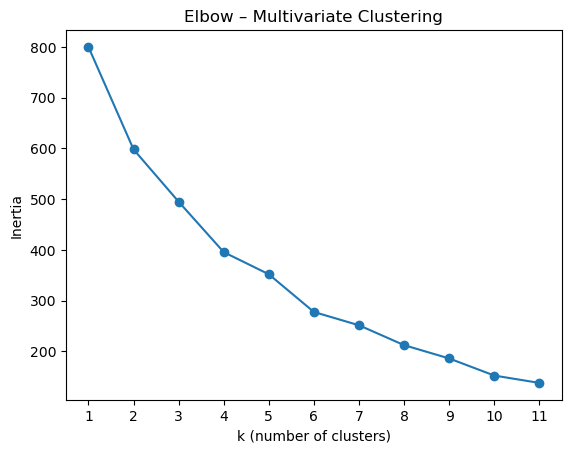

In [37]:
from sklearn.cluster import KMeans
inertia_multi = []
ks = range(1, 12)

for k in ks:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(X)
    inertia_multi.append(km.inertia_)

plt.figure()
plt.plot(ks, inertia_multi, marker="o")
plt.xticks(list(ks))
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow – Multivariate Clustering")
plt.show()


In [38]:
k_opt = 4  # from the elbow
km_multi = KMeans(n_clusters=k_opt, n_init='auto', random_state=42).fit(X)
df[f"multi_cluster_k{k_opt}"] = km_multi.labels_


In [39]:
df.to_csv("clusters_output.csv", index=False)        # table with clusters
